In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from utils import *
locs = pd.read_hdf('test.ome_locs_fitLQ_box9_grad600.hdf5', 'locs')
locs.head(5)

,frame,x,y,photons,sx,sy,bg,lpx,lpy,ellipticity,net_gradient
0,0,241.110855,137.279068,3413.590576,1.385416,1.613175,-75.835320,0.019672,0.014796,0.141187,4595.198730
1,1,240.791428,137.971497,2874.465332,1.476368,1.358110,-80.627823,0.011985,0.016758,0.080100,4373.409668
2,2,181.991196,199.932404,3788.009277,1.546286,1.542073,-76.805458,0.018375,0.018443,0.002725,4288.967285
3,2,240.784286,137.749893,2606.901611,1.417656,1.310441,-67.201950,0.018401,0.020547,0.075629,3799.642090
4,3,186.632706,196.548325,3234.815918,1.281956,1.470561,-61.961788,0.022478,0.021992,0.128254,4658.705078


In [7]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import trackpy as tp
from utils import get_steps_from_df, ger_diff_from_steps

ImportError: cannot import name 'ger_diff_from_steps' from 'utils' (d:\data\2022-04-26_WALKER_DATA\2022-04-26__analysis\utils.py)

<AxesSubplot:xlabel='x', ylabel='y'>

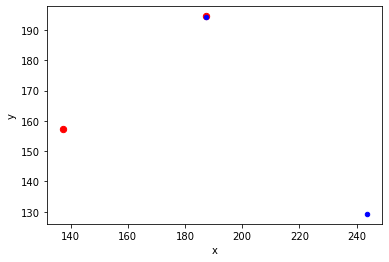

In [8]:
frame_num = 30
frame0 = locs.query(f'frame == {frame_num}')
frame1 = locs.query(f'frame == {frame_num+1}')
frame0.plot.scatter('x','y',c='red', s=40.1)
frame1.plot.scatter('x','y',c='blue', ax=plt.gca())


Frame 97: 1 trajectories present.
mean drift  y    1.441132
x   -0.909772
dtype: float32
53
Diff:  0.06769343465566635 0.36794954723621104
added: 
 0.06799043545361572
appended: 
 0.06833623474079327
All steps aligned to 1D axis: 
 0.0660848902179762


0.05579495614460629

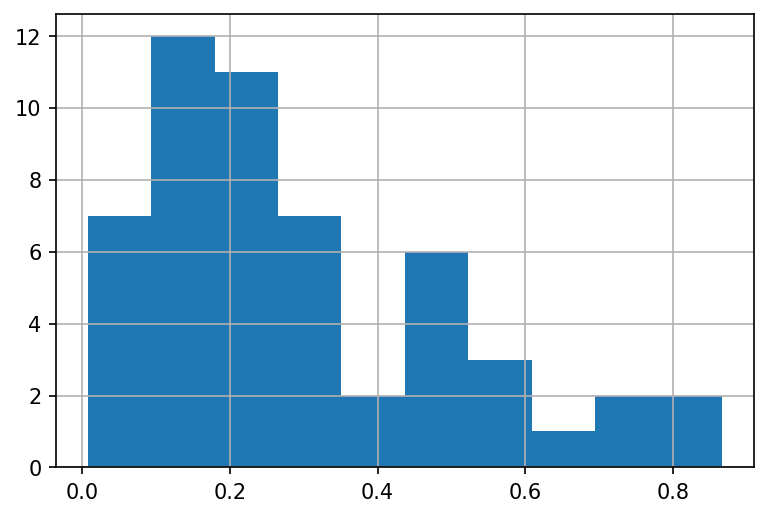

In [11]:
#pred = tp.predict.NearestVelocityPredict()
#sub=locs.query('frame>=100 and frame<=150').copy()
sub = locs
sub['mass']=sub.photons

tray = tp.link(sub, 5)

#count the length of trajectories
tray_by_particle = tray.groupby(['particle'])
tray['length'] = tray_by_particle['particle'].transform('count')

#tray.length.hist()
print("mean drift ", tp.compute_drift(tray).mean())

steps = tray_by_particle.apply(get_steps_from_df)
steps['step_len'] = np.sqrt(steps.dx**2+steps.dy**2)
print(len(steps))





#steps.plot.scatter('dx', 'dy')
print("Diff: ",get_diff_from_steps(steps), np.sqrt(get_diff_from_steps(steps)*2) )
steps.step_len.hist()
# How should the steps be joined? Just rotated? Is this 1D or 2D diffusion?

print("added: \n", np.cov(steps.dx + steps.dy))

print("appended: \n",np.cov(list(steps.dx)+  list(steps.dy)))
#Aligned to one axis
step_len_signed=steps.step_len*np.random.choice((-1,1), size=len(steps)) 
print("All steps aligned to 1D axis: \n",np.cov(step_len_signed)/2)

np.linalg.norm(np.cov([steps.dx, steps.dy])/2)

In [10]:
tray.head(5)

,frame,x,y,photons,sx,sy,bg,lpx,lpy,ellipticity,net_gradient,mass,particle,length
0,0,241.110855,137.279068,3413.590576,1.385416,1.613175,-75.835320,0.019672,0.014796,0.141187,4595.198730,3413.590576,0,3
1,1,240.791428,137.971497,2874.465332,1.476368,1.358110,-80.627823,0.011985,0.016758,0.080100,4373.409668,2874.465332,0,3
2,2,181.991196,199.932404,3788.009277,1.546286,1.542073,-76.805458,0.018375,0.018443,0.002725,4288.967285,3788.009277,1,1
3,2,240.784286,137.749893,2606.901611,1.417656,1.310441,-67.201950,0.018401,0.020547,0.075629,3799.642090,2606.901611,0,3
4,3,186.632706,196.548325,3234.815918,1.281956,1.470561,-61.961788,0.022478,0.021992,0.128254,4658.705078,3234.815918,2,1


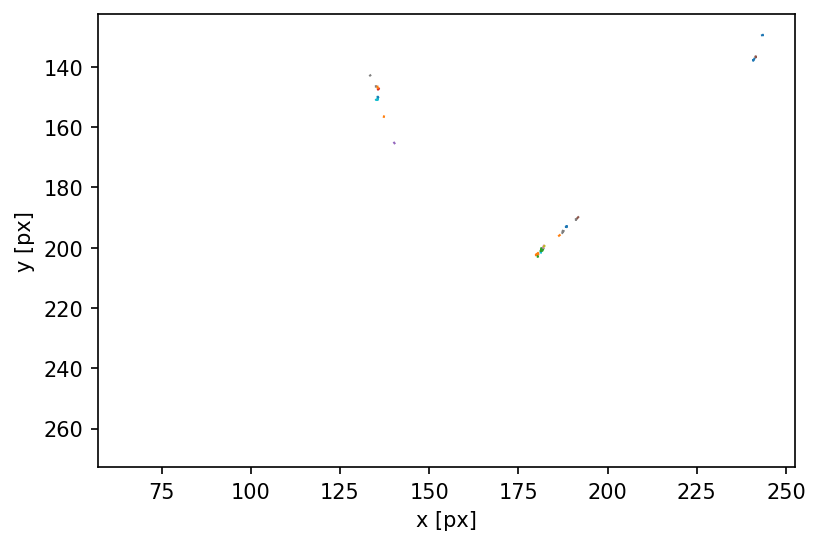

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [8]:
tp.plot_traj(tray)

In [64]:
for i in range(10):
    step_len_signed=steps.step_len*np.random.choice((-1,1), size=len(steps)) 
    print("All steps aligned to 1D axis: ",np.cov(step_len_signed)/2)

All steps aligned to 1D axis:  0.06825267152130308
All steps aligned to 1D axis:  0.0689835074478961
All steps aligned to 1D axis:  0.06450774833146308
All steps aligned to 1D axis:  0.06883128620846124
All steps aligned to 1D axis:  0.06891151247175036
All steps aligned to 1D axis:  0.06649737081172528
All steps aligned to 1D axis:  0.06860987095351094
All steps aligned to 1D axis:  0.06899341796924535
All steps aligned to 1D axis:  0.06899520885635943
All steps aligned to 1D axis:  0.06896206400341624


Diff:  0.06767753048546536


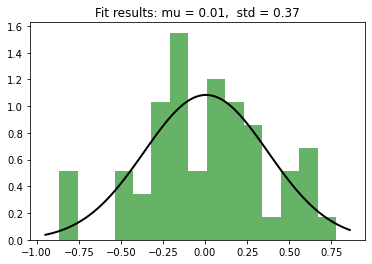

In [70]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

step_len_signed=steps.step_len*np.random.choice((-1,1), size=len(steps)) 
# Generate some data for this demonstration.
data = step_len_signed

# Fit a normal distribution to the data:
mu, std = norm.fit(data)
print("Diff: ",std**2/2)

# Plot the histogram.
plt.hist(data, bins=15, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [ ]:
np.linalg.norm(np.cov([steps.dx**2,steps.dy**2]))